In [ ]:
from google.colab import drive
 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:

import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import concurrent.futures
import tensorflow as tf
from tensorflow import keras
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score
np.random.seed(42)

from matplotlib import style
style.use('fivethirtyeight')

In [ ]:
data_dir = '/content/gdrive/MyDrive/Traffic_Signs'
train_path = '/content/gdrive/MyDrive/Traffic_Signs/Train'
test_path = '/content/gdrive/MyDrive/Traffic_Signs/Test'

# Resizing the images to 30x30x3
IMG_HEIGHT = 30
IMG_WIDTH = 30
channels = 3


In [ ]:
NUM_CATEGORIES = len(os.listdir(train_path))
NUM_CATEGORIES

43

In [ ]:
# Label Overview
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

In [ ]:
folders = os.listdir(train_path)

train_number = []
class_num = []

for folder in folders:
    train_files = os.listdir(train_path + '/' + folder)
    train_number.append(len(train_files))
    class_num.append(classes[int(folder)])
    
# Sorting the dataset on the basis of number of images in each class
zipped_lists = zip(train_number, class_num)
sorted_pairs = sorted(zipped_lists)
tuples = zip(*sorted_pairs)
train_number, class_num = [ list(tuple) for tuple in  tuples]



In [ ]:
image_data = []
image_labels = []

for i in range(NUM_CATEGORIES):
    path = data_dir + '/Train/' + str(i)
    images = os.listdir(path)

    for img in images:
        try:
            image = Image.open(path + '/' + img)
            image = image.resize((30,30))
            image = np.array(image)
            image_data.append(image)
            image_labels.append(i)
        except:
            print("Error in " + img)

# Changing the list to numpy array
image_data = np.array(image_data)
image_labels = np.array(image_labels)

print(image_data.shape, image_labels.shape)

(28951, 30, 30, 3) (28951,)


In [ ]:
X_train, X_val, y_train, y_val = train_test_split(image_data, image_labels, test_size=0.1, random_state=42, shuffle=True)

X_train = X_train/255 
X_val = X_val/255

print("X_train.shape", X_train.shape)
print("X_valid.shape", X_val.shape)
print("y_train.shape", y_train.shape)
print("y_valid.shape", y_val.shape)


X_train.shape (26055, 30, 30, 3)
X_valid.shape (2896, 30, 30, 3)
y_train.shape (26055,)
y_valid.shape (2896,)


In [ ]:
y_train = keras.utils.to_categorical(y_train, NUM_CATEGORIES)
y_val = keras.utils.to_categorical(y_val, NUM_CATEGORIES)

print(y_train.shape)
print(y_val.shape)

(26055, 43)
(2896, 43)


In [ ]:

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
# We have 43 classes that's why we have defined 43 in the dense
model.add(Dense(43, activation='softmax'))




#model = Sequential()
#model.add(VGG19(weights='imagenet', include_top=False, input_shape=(50,50,3)))
#model.add(BatchNormalization())
#model.add(Flatten())
#model.add(Dense(1024, activation='sigmoid'))
#model.add(Dense(43, activation='softmax'))

#results(model)



#add_model = Sequential()
#add_model.add(Flatten(input_shape=vgg16.output_shape[1:]))

#add_model.add(Dense(1024, activation='relu'))



#add_model.add(Dense(y_train.shape[1], activation='softmax'))

#model = Model(inputs=vgg16.input, outputs=add_model(vgg16.output))
#learning_rate = 0.0001
#def results(model):
  #adam = Adam(lr=learning_rate)
# tell the model what cost and optimization method to use
#model.compile(
  #loss='categorical_crossentropy',
  #optimizer='adam',
  #metrics=['accuracy']
#)

In [ ]:

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
aug = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.15,
    horizontal_flip=False,
    vertical_flip=False,
    fill_mode="nearest")

In [ ]:
batch_size = 32
epochs = 15

history = model.fit(aug.flow(X_train, y_train, batch_size=32), epochs=epochs, validation_data=(X_val, y_val))

Epoch 1/15
815/815 [==============================] - 119s 145ms/step - loss: 2.7064 - accuracy: 0.2415 - val_loss: 0.6084 - val_accuracy: 0.8367
Epoch 2/15
815/815 [==============================] - 115s 140ms/step - loss: 0.8156 - accuracy: 0.7399 - val_loss: 0.1447 - val_accuracy: 0.9454
Epoch 3/15
815/815 [==============================] - 114s 140ms/step - loss: 0.4315 - accuracy: 0.8641 - val_loss: 0.0585 - val_accuracy: 0.9845
Epoch 4/15
815/815 [==============================] - 114s 140ms/step - loss: 0.2900 - accuracy: 0.9089 - val_loss: 0.0280 - val_accuracy: 0.9945
Epoch 5/15
815/815 [==============================] - 114s 139ms/step - loss: 0.2112 - accuracy: 0.9333 - val_loss: 0.0200 - val_accuracy: 0.9941
Epoch 6/15
815/815 [==============================] - 116s 143ms/step - loss: 0.1799 - accuracy: 0.9459 - val_loss: 0.0213 - val_accuracy: 0.9934
Epoch 7/15
815/815 [==============================] - 115s 142ms/step - loss: 0.1542 - accuracy: 0.9525 - val_loss: 0.0133 -

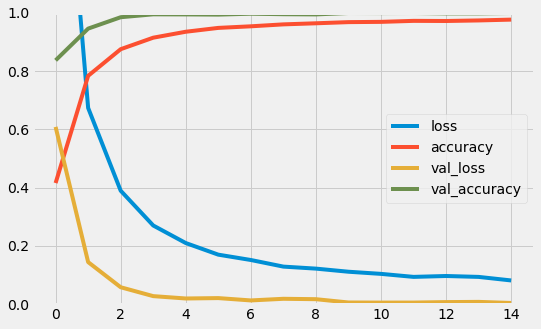

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
import random
from matplotlib.image import imread
def testing(testcsv):
    y_test = pd.read_csv(testcsv + '/Test.csv')
    label = y_test["ClassId"].values
    imgs = '/content/gdrive/MyDrive/Traffic_Signs/' + y_test["Path"].values 
    data=[]
    for img in imgs:
        image = Image.open(img)
        image = image.resize((30,30))
        data.append(np.array(image))
    X_test=np.array(data)
    return X_test,label


In [ ]:
testcsv = '/content/gdrive/MyDrive/Traffic_Signs'
X_test, label = testing(testcsv)

In [ ]:
Y_pred = model.predict_classes(X_test)
Y_pred

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([16,  1, 38, ...,  0,  2, 13])